In [1]:
import numpy as np
import sympy as sym
from newton_solve import newton_solve

v7s = ['x', 'y', 'z']
fns = [
    'x ** 2 + y ** 2 + z ** 2 - 1',
    '2 * x ** 2 + y ** 2 - 4 * z',
    '3 * x ** 2 - 4 * y + z ** 2'
]

f = sym.Matrix(fns)
jacobian = f.jacobian(v7s)

# переводит выражения SymPy в функции Python
f = sym.lambdify(sym.symbols(v7s), f)
jacobian = sym.lambdify(sym.symbols(v7s), jacobian)

# Якобиан
# 2x 2y 2z
# 4x 2y -4
# 6x -4 2z

In [2]:
# По графикам нашел где примерно корни
start_approx_1 = np.array([1, 1, 1])
start_approx_2 = np.array([-0.5, 0.5, 0.5])

s1 = newton_solve(jacobian, f, start_approx_1)
s2 = newton_solve(jacobian, f, start_approx_2)

print(s1, s2)

[ nan -inf  inf] [-0.78519503  0.49661365  0.36992189]


/home/andrey/SEM_04/CA/lab_05/newton_solve.py:33: RuntimeWarning: divide by zero encountered in divide
  while any(map(lambda x: abs(x) >= eps, deltas / approx)):
<lambdifygenerated-1>:2: RuntimeWarning: overflow encountered in scalar power
  return array([[x**2 + y**2 + z**2 - 1], [2*x**2 + y**2 - 4*z], [3*x**2 - 4*y + z**2]])
/home/andrey/SEM_04/CA/lab_05/newton_solve.py:55: RuntimeWarning: invalid value encountered in subtract
  res[i] = (F[i] - C[i] * res[i + 1]) / B[i]
/home/andrey/SEM_04/CA/lab_05/newton_solve.py:33: RuntimeWarning: invalid value encountered in divide
  while any(map(lambda x: abs(x) >= eps, deltas / approx)):


(4.990234375, 10)


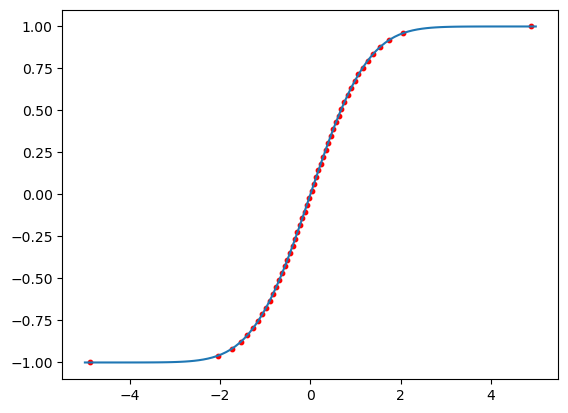

In [3]:
from math_method import *
import matplotlib.pyplot as plt

def Laplas(x, integralCount=10, integralMethod=SympsonIntegral):
    def underIntegral(x):
        return np.exp(-x ** 2 / 2)
    intx = np.linspace(0, x, integralCount)
    return 2 / sqrt(2 * np.pi) * integralMethod(intx, underIntegral)


x = np.linspace(-5, 5, 100)
y = [Laplas(i) for i in x]

y_pred = np.linspace(-0.999999, 0.999999, 50)
x_pred = [HalfDivision(Laplas, y, min(x), max(x), maxIter=30, epsilon=1e-8)[0] for y in y_pred]

# print(y_pred)
# print(x_pred)

name='HalfDivision'
plt.plot(x, y)
plt.scatter(x_pred, y_pred, color='red', s=10, marker='o')

print(HalfDivision(Laplas, -1, -5, 5))

$$
\begin{cases}
y'' - y^3 = x^2, \\
0 \leq x \leq 1, \\
x = 0, y = 1, \\
x = 1, y = 3.
\end{cases}
$$

[1.         1.00535196 1.01080554 1.01636244 1.02202442 1.02779332
 1.03367103 1.03965955 1.04576094 1.05197733 1.05831095 1.06476411
 1.07133919 1.07803867 1.08486513 1.09182123 1.09890973 1.1061335
 1.1134955  1.1209988  1.12864657 1.13644212 1.14438885 1.15249029
 1.1607501  1.16917206 1.17776009 1.18651826 1.19545075 1.20456192
 1.21385629 1.22333851 1.23301342 1.24288602 1.25296152 1.26324527
 1.27374287 1.28446008 1.29540289 1.30657752 1.31799042 1.32964826
 1.34155799 1.35372681 1.3661622  1.37887193 1.39186407 1.40514702
 1.41872949 1.43262057 1.44682968 1.46136667 1.47624175 1.49146559
 1.50704929 1.52300443 1.53934309 1.55607787 1.57322192 1.59078899
 1.60879344 1.62725027 1.64617521 1.66558468 1.6854959  1.70592691
 1.72689663 1.7484249  1.77053255 1.79324147 1.81657465 1.84055629
 1.86521186 1.89056817 1.91665352 1.94349771 1.97113225 1.99959041
 2.02890737 2.05912036 2.09026882 2.12239456 2.15554196 2.18975815
 2.22509322 2.2616005  2.29933681 2.33836272 2.37874293 2.42054

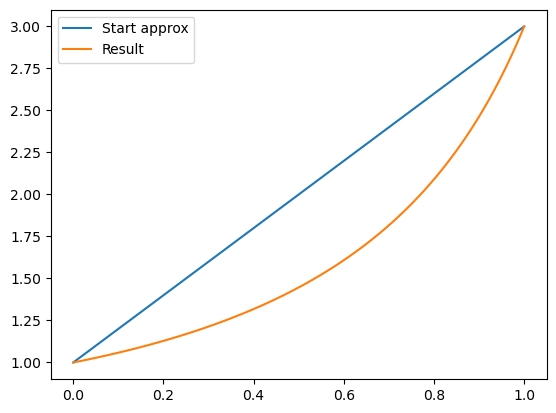

In [4]:
import matplotlib.pyplot as plt
from newton_solve import *

n = 100
h = 1 / n

variables = [f'y{i}' for i in range(n + 1)]

x0, xn = 0, 1
y0, yn = 1, 3

x = np.linspace(x0, xn, n + 1, endpoint=True)

functions = [f'y0 - {y0}'] + [
    f'y{i - 1} - 2 * y{i} + y{i + 1} - {h} ** 2 * ({x[i]} ** 2 + y{i} ** 3)'
    for i in range(1, n)
] + [f'y{n} - {yn}']

f = sym.Matrix(functions)
jacobian = f.jacobian(variables)

# переводит выражения SymPy в функции Python
f = sym.lambdify(sym.symbols(variables), f)
jacobian = sym.lambdify(sym.symbols(variables), jacobian)


tan = (yn - y0) / (xn - x0)
start_approx = [y0 + tan * i * h for i in range(n + 1)]

s = newton_solve(jacobian, f, start_approx)

print(s)

plt.plot(x, start_approx, label="Start approx")
plt.plot(x, s, label="Result")
plt.legend()